# out of bag score(oob_score)

In [1]:
import pandas as pd
data = pd.read_csv('heart.csv')

In [2]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = data.drop(columns=['output'])
y = data['output']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf = RandomForestClassifier(oob_score=True)

In [8]:
rf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [9]:
rf.oob_score_

0.8099173553719008

In [10]:
y_pred = rf.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test,y_pred)

0.8524590163934426

In [13]:
rf.score(x_train,y_train)

1.0

# feature importance 

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=5, n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=0)

In [17]:
dtc = DecisionTreeClassifier()

In [18]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [19]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

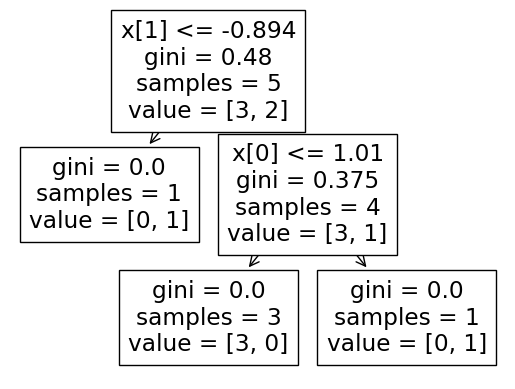

In [20]:
plot_tree(dtc)

In [23]:
dtc.feature_importances_

array([0.625, 0.375])

In [24]:
rf2 = RandomForestClassifier(n_estimators=2)

In [27]:
rf2.fit(x,y)

RandomForestClassifier(n_estimators=2)

In [28]:
rf2.feature_importances_

array([0.48611111, 0.51388889])

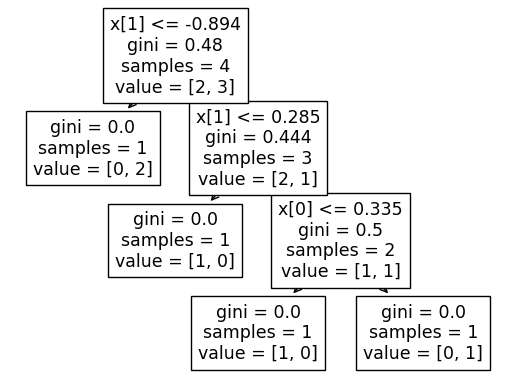

In [29]:
for i in range(0,2):
     plot_tree(rf2.estimators_[i])